### Notebook Gaps vs. Session Repeats

In [1]:
import pandas as pd

# Data containing information abut analyzing repeated code based on
# 1. repeated cells in session histories
# 2. gaps in notebook execution counts
history_repeats = pd.read_parquet('history-repeats.parquet')
nb_cell_repeats = pd.read_parquet('nb-repeats.parquet')

,gap,count
0,1,30565
1,2,13594
2,3,7526
3,4,5321
4,5,3663
...,...,...
313,860,1
314,933,1
315,1155,1
316,1160,1


In [2]:
nb50 = nb_cell_repeats[nb_cell_repeats.gap <= 20].copy()
nb50['pct'] = nb50['count'] / nb50['count'].sum()

In [3]:
hist50 = history_repeats[history_repeats.num_repeats <= 20].copy()
hist50['pct'] = hist50['count'] / hist50['count'].sum()

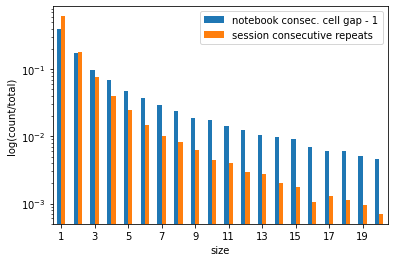

In [5]:
from matplotlib.ticker import MaxNLocator
ax = nb50.merge(hist50, left_on='gap', right_on='num_repeats')[['gap','pct_x','pct_y']].rename(columns={'pct_x': 'notebook consec. cell gap - 1', 'pct_y': 'session consecutive repeats','gap': 'size'}).plot(kind='bar',x='size',logy=True, ylabel='log(count/total)')
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.tick_params(axis='x', labelrotation = 0)
ax.figure.savefig('session-vs-notebook-repeats.pdf', bbox_inches='tight')

### Repeated Sessions

In [6]:
smdf = pd.read_parquet('session-matches.parquet')

,sha,session1,session2,lines_matched,lines_checked,session_diff,match_ratio
0,00baa5d85f22d81f1baf3bf453132486cf311e02,7,8,13,15,1,0.866667
1,00f91a669626007d721226d7aa2bf44534e37bc1,199,200,16,18,1,0.888889
2,00f91a669626007d721226d7aa2bf44534e37bc1,270,271,16,19,1,0.842105
3,00f91a669626007d721226d7aa2bf44534e37bc1,425,426,29,29,1,1.000000
4,00f91a669626007d721226d7aa2bf44534e37bc1,454,479,3,5,25,0.600000
...,...,...,...,...,...,...,...
28020,fe1e45755dbf48e5424d54f0a4180043efd84c0c,186,187,8,8,1,1.000000
28021,fe1e45755dbf48e5424d54f0a4180043efd84c0c,194,195,6,6,1,1.000000
28022,fe1e45755dbf48e5424d54f0a4180043efd84c0c,199,202,2,2,3,1.000000
28023,fe1e45755dbf48e5424d54f0a4180043efd84c0c,338,339,7,9,1,0.777778


In [7]:
first_repeat = smdf.groupby(['sha','session1'])['session2'].min().to_frame().reset_index()

,sha,session1,session2
0,00baa5d85f22d81f1baf3bf453132486cf311e02,7,8
1,00f91a669626007d721226d7aa2bf44534e37bc1,199,200
2,00f91a669626007d721226d7aa2bf44534e37bc1,270,271
3,00f91a669626007d721226d7aa2bf44534e37bc1,425,426
4,00f91a669626007d721226d7aa2bf44534e37bc1,454,479
...,...,...,...
5158,fe1e45755dbf48e5424d54f0a4180043efd84c0c,186,187
5159,fe1e45755dbf48e5424d54f0a4180043efd84c0c,194,195
5160,fe1e45755dbf48e5424d54f0a4180043efd84c0c,199,202
5161,fe1e45755dbf48e5424d54f0a4180043efd84c0c,338,339


In [8]:
first_repeat['session_diff'] = first_repeat['session2'] - first_repeat['session1']

In [9]:
first_repeat

,sha,session1,session2,session_diff
0,00baa5d85f22d81f1baf3bf453132486cf311e02,7,8,1
1,00f91a669626007d721226d7aa2bf44534e37bc1,199,200,1
2,00f91a669626007d721226d7aa2bf44534e37bc1,270,271,1
3,00f91a669626007d721226d7aa2bf44534e37bc1,425,426,1
4,00f91a669626007d721226d7aa2bf44534e37bc1,454,479,25
...,...,...,...,...
5158,fe1e45755dbf48e5424d54f0a4180043efd84c0c,186,187,1
5159,fe1e45755dbf48e5424d54f0a4180043efd84c0c,194,195,1
5160,fe1e45755dbf48e5424d54f0a4180043efd84c0c,199,202,3
5161,fe1e45755dbf48e5424d54f0a4180043efd84c0c,338,339,1


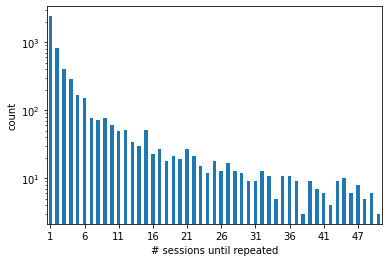

In [10]:
from matplotlib.ticker import MaxNLocator
ax = first_repeat['session_diff'].value_counts().sort_index().plot(kind='bar',logy=True,ylabel='count',xlabel='# sessions until repeated')
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.tick_params(axis='x', labelrotation = 0)
ax.figure.savefig('sessions-until-repeat.pdf', bbox_inches='tight')

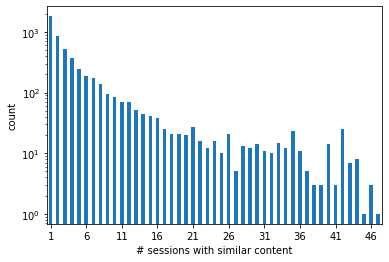

In [11]:
from matplotlib.ticker import MaxNLocator
ax = smdf.groupby(['sha','session1']).size().value_counts().sort_index().plot(kind='bar',logy=True,ylabel='count',xlabel='# sessions with similar content')
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.tick_params(axis='x', labelrotation = 0)
ax.figure.savefig('/Users/dakoop/Documents/Papers/notebook-archaeology/figures/sessions-repeat-count.pdf', bbox_inches='tight')

### Gap-Jump Counts

In [12]:
# data containing information about the distribution of gaps and jumps
gap_jump_counts = pd.read_parquet('gap-jump-counts.parquet')

,gap,jump,count
6200,58,9,1
2812,565,8,1
2815,178,6,1
2818,6,66,1
4831,209,2,1
...,...,...,...
45,1,2,7200
11,4,1,7526
14,3,1,13594
8,2,1,30565


In [13]:
gap_jump_counts.loc[gap_jump_counts.gap == 1,'count'].sum() / gap_jump_counts['count'].sum()

0.8299085601277433

In [14]:
gap_jump_counts.loc[gap_jump_counts.jump == 1,'count'].sum() / gap_jump_counts['count'].sum()

0.8955866372698716

In [15]:
jump_counts = gap_jump_counts.groupby('jump')['count'].sum().sort_values()

jump
-374         1
 103         1
 102         1
 101         1
 98          1
         ...  
-2        5401
 3        8398
-1        9367
 2       22495
 1      768948
Name: count, Length: 273, dtype: int64

In [16]:
jump_counts[1] / jump_counts.sum()

0.8955866372698716

<AxesSubplot:xlabel='jump'>

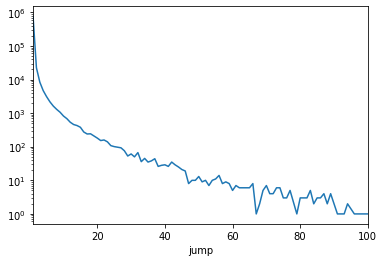

In [17]:
jump_counts.sort_index().plot(xlim=(1,100),logy=True)

<AxesSubplot:xlabel='jump'>

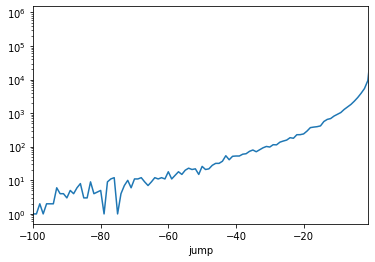

In [18]:
jump_counts.sort_index().plot(xlim=(-100,-1),logy=True)